In [1]:
!pip install --upgrade pip
!pip install transformers
!pip install datasets
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


#Getting the data

In [2]:
# Emotion detector
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are total of {len(all_datasets)} in the hub")
print(f"Some example datasets are {all_datasets[:5]}")

<ipython-input-2-d8db1cb5906a>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are total of 148583 in the hub
Some example datasets are ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus']


In [3]:
from datasets import load_dataset
emotion_dataset = load_dataset('emotion')
emotion_dataset

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_dataset = emotion_dataset['train']
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_dataset)

16000

In [6]:
train_dataset[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [7]:
train_dataset[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [8]:
train_dataset.column_names

['text', 'label']

In [9]:
train_dataset.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
train_dataset.features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [11]:
train_dataset.features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [12]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train

--2024-04-22 15:54:43--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447555 (437K) [text/plain]
Saving to: ‘sentiment_train’

sentiment_train     100%[===================>] 437.07K  --.-KB/s    in 0.009s  

2024-04-22 15:54:44 (45.5 MB/s) - ‘sentiment_train’ saved [447555/447555]



In [13]:
# load the dataset
sentiment_train = load_dataset('csv',data_files = "sentiment_train",sep='\t')
sentiment_train

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'text'],
        num_rows: 6918
    })
})

In [14]:
import pandas as pd
emotion_dataset.set_format(type='pandas')
df = emotion_dataset['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
emotion_dataset['train'].features['label'].int2str(0)

'sadness'

In [16]:
emotion_dataset['train'].features['label'].int2str(1)

'joy'

In [17]:
def label_to_str(row):
  return emotion_dataset['train'].features['label'].int2str(row)

df['labels_name'] = df['label'].apply(label_to_str)
df.head()

,text,label,labels_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


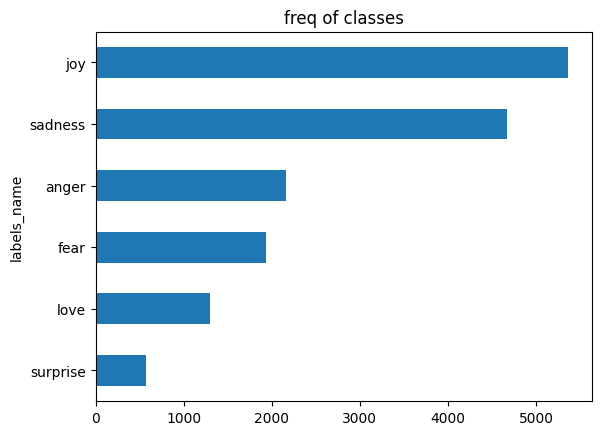

In [18]:
import matplotlib.pyplot as plt
df['labels_name'].value_counts(ascending=True).plot.barh()
plt.title("freq of classes")
plt.show()

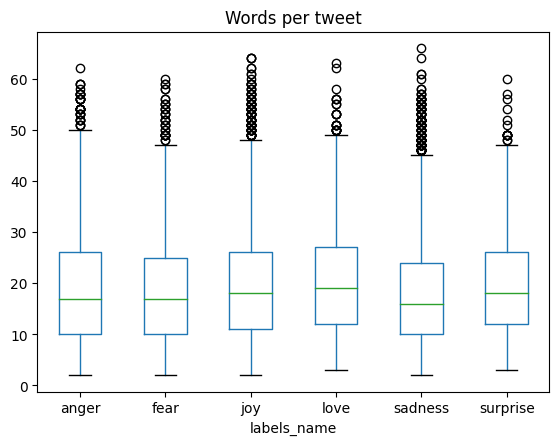

In [19]:
# Length of the document

df['Words per tweet'] = df['text'].str.split(" ").apply(len)
df.boxplot("Words per tweet", by = 'labels_name', grid=False)
plt.suptitle("")
plt.show()

In [20]:
emotion_dataset.reset_format()

In [21]:
from transformers import AutoTokenizer
model = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [22]:
text = "My favorite food is Masala Dosa"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2026, 5440, 2833, 2003, 16137, 7911, 9998, 2050, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [23]:
type(encoded_text)

transformers.tokenization_utils_base.BatchEncoding

In [24]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'my', 'favorite', 'food', 'is', 'mas', '##ala', 'dos', '##a', '[SEP]']


In [25]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] my favorite food is masala dosa [SEP]'

In [26]:
tokenizer.vocab_size

30522

In [27]:
tokenizer.model_max_length

512

In [28]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

#Tokenize the dataset

In [29]:
# map()
def tokenization(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

tokenization(emotion_dataset['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [30]:
emotions_encoded = emotion_dataset.map(tokenization, batched=True, batch_size=None)
emotions_encoded

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

#Loading Pretrained Model

In [31]:
from transformers import TFAutoModel
model_name = 'distilbert-base-uncased'
model = TFAutoModel.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [32]:
ex_text ='this a test document'
inputs = tokenizer(ex_text, return_tensors='tf')
print(inputs)

{'input_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[ 101, 2023, 1037, 3231, 6254,  102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1]], dtype=int32)>}


In [33]:
outputs = model(inputs)
outputs

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 6, 768), dtype=float32, numpy=
array([[[-0.24796993, -0.2050729 ,  0.00369561, ..., -0.17272134,
          0.17205586,  0.35237196],
        [-0.33758283, -0.24704693,  0.00999878, ..., -0.3119816 ,
          0.52231634,  0.26820892],
        [-0.21965715,  0.04554176,  0.15866572, ..., -0.30742165,
          0.12377836,  0.536172  ],
        [ 0.35309824, -0.3318181 ,  0.00846244, ..., -0.65165585,
          0.1653182 , -0.41735336],
        [-0.08453427, -0.16688034, -0.0744253 , ..., -0.0199534 ,
          0.11812034, -0.10662828],
        [ 0.8059628 ,  0.08178004, -0.5555366 , ...,  0.1277847 ,
         -0.671377  , -0.24220616]]], dtype=float32)>, hidden_states=None, attentions=None)

In [34]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [35]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [36]:
def extract_hidden_states(batch):
  inputs = {k:v for k,v in batch.items() if k in tokenizer.model_input_names}

  last_hidden_state = model(**inputs).last_hidden_state
  return {'hidden_state':last_hidden_state[:,0]}

In [37]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [38]:
emotions_encoded.set_format('tensorflow', columns=['input_ids','attention_mask','label'])

In [39]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [40]:
emotions_hidden_data = emotions_encoded.map(extract_hidden_states,batched=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

#Preparation of the data with features extracted

In [41]:
import numpy as np
X_train = np.array(emotions_hidden_data['train']['hidden_state'])
X_valid = np.array(emotions_hidden_data['validation']['hidden_state'])
y_train = np.array(emotions_hidden_data['train']['label'])
y_valid = np.array(emotions_hidden_data['validation']['label'])
X_train.shape,X_valid.shape

((16000, 768), (2000, 768))

In [42]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.8 MB/s eta 0:00:00


In [43]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_embed = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_embed["label"] = y_train
df_embed.head()

,X,Y,label
0,4.284018,6.725506,0
1,-3.175946,5.962384,0
2,5.331228,3.188439,3
3,-2.479085,3.917038,2
4,-3.455541,4.078790,3


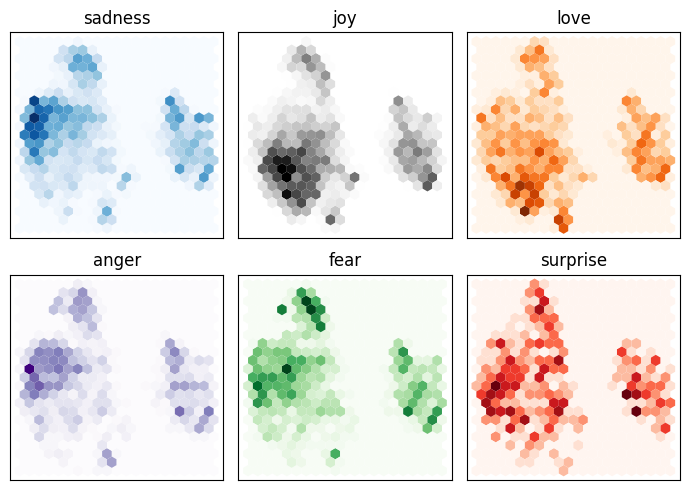

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Blues", "Greys", "Oranges", "Purples", "Greens", "Reds"]
labels = emotion_dataset["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_embed_sub = df_embed.query(f"label == {i}")
    axes[i].hexbin(df_embed_sub["X"], df_embed_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression(max_iter= 3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [47]:
lr.score(X_valid,y_valid)

0.6335

In [48]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_valid,y_valid)

0.352

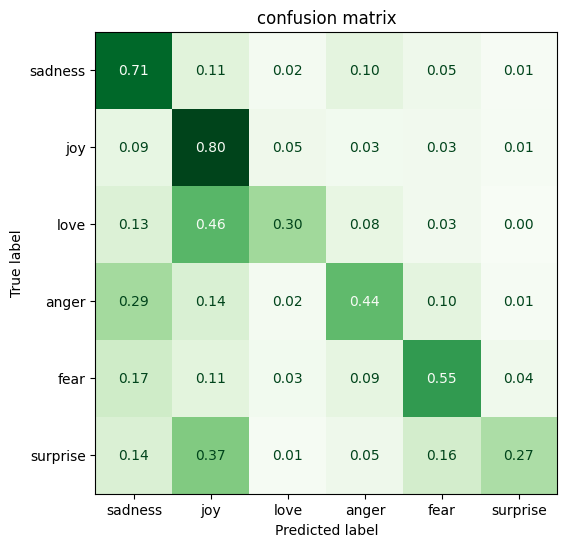

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Greens", values_format=".2f", ax=ax, colorbar=False)
    plt.title("confusion matrix")
    plt.show()

y_preds = lr.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

#Other way of making this text classification

##Finetuning the model from huggingface

In [50]:
from transformers import TFAutoModelForSequenceClassification
num_labels = 6
tf_model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [51]:
emotions_encoded['validation']['label']

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([0, 0, 2, ..., 1, 1, 1])>

In [52]:
from sklearn.metrics import accuracy_score, f1_score,classification_report

def metrics_compute(pred):
  labels = emotions_encoded['validation']['label']
  predictions = np.argmax(pred,axis=1)
  acc = accuracy_score(labels,predictions)
  cr = classification_report(labels,predictions)
  print(f"accuracy score is {acc}")
  print(f"Classfication report: \n {cr}")

In [53]:
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded['train'].to_tf_dataset(
    columns = tokenizer_columns,
    label_cols = ['label'],
    shuffle = True,
    batch_size=128
)

tf_test_dataset = emotions_encoded['validation'].to_tf_dataset(
    columns = tokenizer_columns,
    label_cols = ['label'],
    shuffle = True,
    batch_size=128
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [62]:
# model.compile(optimizer= 'adam' , loss= keras.losses.binary_crossentropy, metrics=['accuracy'])


In [55]:
tf_model.compile(Adam(learning_rate=0.00005), loss = SparseCategoricalCrossentropy(from_logits=True), metrics = SparseCategoricalAccuracy())

ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7ab121733790>

In [56]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Assuming `tf_model` is your TensorFlow model instance
optimizer = Adam(learning_rate=0.00005)
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
metrics = [SparseCategoricalAccuracy()]

# Compile the TensorFlow model
tf_model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7ab2c628e590>

In [57]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy


In [58]:
optimizer = Adam(learning_rate=0.00005)
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
metrics = [SparseCategoricalAccuracy()]


In [59]:
tf_model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7ab49a53c3d0>

In [ ]:
tf_model.fit(tf_train_dataset, validation_data=tf_test_dataset,epochs=2)

In [ ]:
pred = tf_model.predict(tf_test_dataset)

In [ ]:
np.argmax(pred.logits,axis=1)

In [ ]:
eval = tf_model.evaluate(tf_test_dataset)